# Chanho Lim and Roland Nguyen

## An Analysis of 

   ### - Android's Google Play Store
   
   ### - IOS's Apple App Store
   
   ### - And a comparison between the two
   
##### Last Updated: 12/4/19

#### Table of Contents:

    1. Data Collection - Introduction
        A. Overview of Data
        B. Motivation
        C. Requirements
    2. Data Processing - Data Munging
        A. Load both datasets
        B. Clean Google Playstore dataset
        C. Clean Apple Playstore dataset
    3. Exploratory Analysis and Data Visualization
        A. Surveying the battlefield
        B. First Blood
    4. Analysis, Hypothesis, and ML
        A. Apple Strikes Back
    5. Insight and Policy Decision


### Introduction

#### Overview of Data:

Both Apple App Store dataset and Google Play Store dataset are public datasets obtained from Kaggle.
According to the uploaders of these datasets, the Apple App Store dataset was acquired through Apple's ITunes API by the user Ramanathan while the Google Play Store dataset was gleaned through web scraping by Kaggle user Lavanya Gupta.

They feature details describing various applications on their respective application stores. 
These details include important statistics one can draw from like installation counts, overall ratings, pricing, and more.

The Apple App Store dataset was most recently updated on June 10, 2018.

The Google Play Store dataset was most recently updated on February 3, 2019.

#### Motivation:

Our motivation for such an analysis comes from our personal dedication towards our mobile operating system of choice. Both Chanho and Roland prefer Android for their phones however the two have had disputes regarding the quality of apps within Google’s Android ecosystem as opposed to that of Apple’s iOS ecosystem relative to the price one would pay for those apps. For that reason, the two have opted to perform analysis and witness with their own eyes the true victor of this dispute. In the following cells, they will set out to observe comparisons of the two operating systems' datasets on various levels - i.e., by Store, by genre, by price range, by content rating, and even by app to app.

Informing the populace of such knowledge may be able to sway them to the other side when it comes to their next smartphone.

#### Requirements:

[Google Play Store dataset](https://www.kaggle.com/lava18/google-play-store-apps)

[Apple App Store dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

Pandas

Numpy

Seaborn

Matplotlib

Scipy

Sklearn

### Data Processing

In [1]:
#import all necessary libraries and read csv files
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




ggplay_df = pd.read_csv("./googleplaystore.csv")
ggplay_user_df = pd.read_csv('./googleplaystore_user_reviews.csv')
apple_df = pd.read_csv('./AppleStore.csv')
apple_desc_df=pd.read_csv('./appleStore_description.csv')

### Clean the column variables from googleplaystore.csv and AppleStore.csv

First, we identified columns that we cannot match against the other (i.e. columns that are not present in the other dataframe). Then we dropped those columns, then we mapped the column variables so that they are easier to identify between both dataframes. 

In [2]:
ggplay_df = ggplay_df.drop(['Reviews','Current Ver', 'Android Ver', 'Last Updated','Size', 'Category'], axis = 1)
ggplay_df = ggplay_df.rename(columns = {'Genres' : 'Genre'})
ggplay_df['Price'] = ggplay_df.Price.map(lambda x: ''.join([i for i in x if i.isdigit() or i=='.']))
ggplay_df.Price = ggplay_df.Price.replace('', np.nan)
ggplay_df.Price = ggplay_df.Price.astype(np.float64)

In [3]:
ggplay_df.Installs = ggplay_df.Installs.replace('Free', '0')
ggplay_df.Installs = ggplay_df.Installs.map(lambda x: ''.join([i for i in x if i.isdigit()]))
ggplay_df = ggplay_df.rename(columns = {'Installs' : 'Installs_plus'})
ggplay_df.Installs_plus.unique()
ggplay_df.Installs_plus = ggplay_df.Installs_plus.astype('int64')

In [4]:
apple_df = apple_df.rename(columns = {'user_rating' : 'Rating','track_name' : 'App', 'ver' : 'Current Ver', 'price' : 'Price', 'prime_genre' : 'Genres', 'size_bytes' : 'Size', 'cont_rating' : 'Content Rating', 'rating_count_tot' : 'Rating Count'})
apple_df = apple_df.drop(['id', 'Size', 'Unnamed: 0','sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic' , 'currency', 'Current Ver', 'user_rating_ver', 'rating_count_ver'], axis=1)
apple_df['Type'] = np.where(apple_df['Price'] == 0.00, 'Free', 'Paid')
apple_df = apple_df[['App', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres', 'Rating Count']]

display(ggplay_df)
display(apple_df)

,App,Rating,Installs_plus,Type,Price,Content Rating,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,3.9,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,4.5,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,5.0,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,NaN,1000,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,4.5,1000,Free,0.0,Mature 17+,Books & Reference


,App,Rating,Type,Price,Content Rating,Genres,Rating Count
0,PAC-MAN Premium,4.0,Paid,3.99,4+,Games,21292
1,Evernote - stay organized,4.0,Free,0.00,4+,Productivity,161065
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",3.5,Free,0.00,4+,Weather,188583
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.0,Free,0.00,12+,Shopping,262241
4,Bible,4.5,Free,0.00,4+,Reference,985920
...,...,...,...,...,...,...,...
7192,Kubik,4.5,Free,0.00,4+,Games,142
7193,VR Roller-Coaster,4.5,Free,0.00,4+,Games,30
7194,Bret Michaels Emojis + Lyric Keyboard,4.5,Paid,1.99,9+,Utilities,15
7195,VR Roller Coaster World - Virtual Reality,4.5,Free,0.00,12+,Games,85


### Exploratory Analysis and Data Visualization

### A. Genre Distribution

As avid gamers, (though never mobile gamers) we've wondered to ourselves was, "What is the distribution of the video game genre between the two app stores?"

In order to solve this question, we've opted to create a piechart for each dataframe, representing the portion of each genre by counting the values of each genre, then displaying the top 15 and the rest as etc. As shown below, we can see that games take up a huge portion of apple store dataset, whereas Google Playstore does not even contain games in the top 15. 

Text(0.5, 1.0, 'Google Play Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

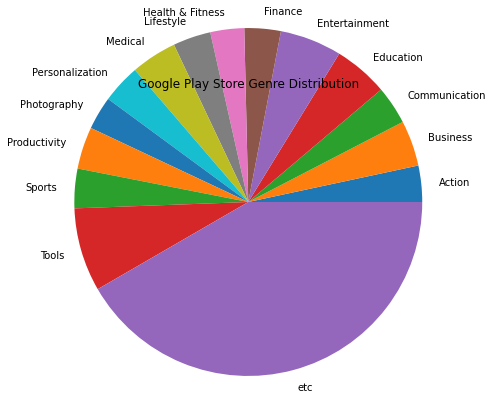

In [5]:
plt.figure(figsize = (20,20))
biggroups = ggplay_df.Genre.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
ggplay_df['Category'] = ggplay_df.Genre.apply(lambda x: categorize(x))
genres = ggplay_df.Category.value_counts().sort_index().index
size = ggplay_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('Google Play Store Genre Distribution')

Text(0.5, 1.0, 'App Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

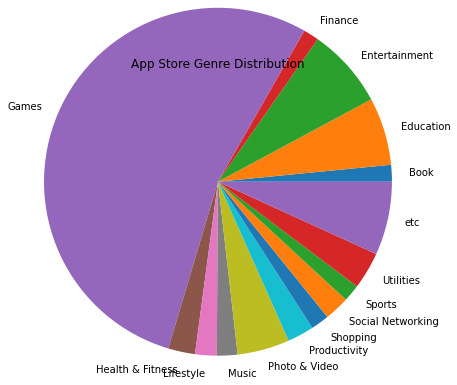

In [6]:
plt.figure(figsize = (20,20))
biggroups = apple_df.Genres.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
apple_df['Category'] = apple_df.Genres.apply(lambda x: categorize(x))
genres = apple_df.Category.value_counts().sort_index().index
size = apple_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('App Store Genre Distribution')

Looking at the two pie charts, we notice just how big the games genre is in the Apple App Store. Naturally, we were curious how the games genre size would stack up in the Google Play Store.

Here, we encounter a major problem. The games genre is split up into muliple subgenres, as in the genre of game. 
So below we will have to do some work on binning those subgenres into a genre representing games overall.

To do so, we have created a function that, if it's genre is one of the 120 original genres we have deemed to be considered games, it will relabel it to such a category.

We will then apply that function to the entire row of Genre.

In [7]:
def relabel_genres (row):
    if row['Genre'] in ['Art & Design;Action & Adventure',
                       'Education;Action & Adventure','Education;Pretend Play',
                       'Education;Brain Games','Entertainment;Brain Games','Adventure;Action & Adventure',
                       'Arcade', 'Casual', 'Card',
                       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
                       'Word', 'Racing', 'Casual;Creativity',
                       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
                       'Trivia', 'Role Playing', 'Simulation;Education',
                       'Action;Action & Adventure', 'Casual;Brain Games',
                       'Simulation;Action & Adventure', 'Educational;Creativity',
                       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain Games',
                       'Educational;Brain Games', 'Educational;Pretend Play',
                       'Entertainment;Education', 'Casual;Education',
                       'Music;Music & Video', 'Racing;Action & Adventure',
                       'Arcade;Pretend Play', 'Role Playing;Action & Adventure',
                       'Simulation;Pretend Play', 'Puzzle;Creativity',
                       'Sports;Action & Adventure', 'Educational;Action & Adventure',
                       'Arcade;Action & Adventure', 'Entertainment;Action & Adventure',
                       'Puzzle;Action & Adventure', 'Strategy;Action & Adventure',
                       'Adventure;Education', 'Board;Brain Games',
                       'Board;Action & Adventure', 'Board;Pretend Play',
                       'Casual;Music & Video', 'Role Playing;Pretend Play',
                       'Entertainment;Pretend Play', 'Video Players & Editors;Creativity',
                       'Card;Action & Adventure']: return 'Games'
    else:
        return row['Genre']
    
ggplay_df['Genre'] = ggplay_df.apply(lambda row: relabel_genres(row), axis=1)

Now we can once again create the pie chart for Google Play showing the distribution of genres the same way as the two above pie graphs.

Text(0.5, 1.0, 'Google Play Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

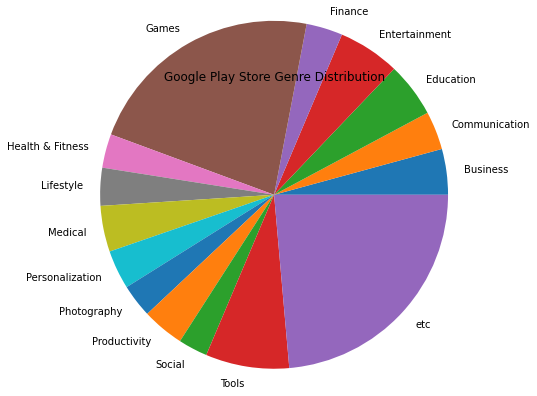

In [8]:
plt.figure(figsize = (20,20))
biggroups = ggplay_df.Genre.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
ggplay_df['Category'] = ggplay_df.Genre.apply(lambda x: categorize(x))
genres = ggplay_df.Category.value_counts().sort_index().index
size = ggplay_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('Google Play Store Genre Distribution')

From this pie chart, we can better see how much of the distribution of genres is games.
As expected, this is a large chunk, however, one might notice that this pales in compairson to the portion that the genre took up in the Apple App Store dataset.

A conclusion on this data can be construed in many ways, so instead of telling the reader what this means, we will leave a  possible interpretation and leave it up to the reader to decide on one.

One could argue that the Play Store's lower barrier of entry allows for smaller developers to more easier to upload anything they want. Google Play simply requires a developer registration fee of \\$25 and doesn't check published apps before posting them. They deal with malicious apps once there have been many reports. Apple on the other hand has an annual \\$99 Apple Developer fee to publish apps. Furthermore, Apple tends to review each and every app before releasing it. Knowing this, the natural conclusion is that the App Store MUST have higher quality apps then. We shall explore this later on in the notebook.

[Here is an article about the obstacles to publish on each storefront](https://www.cleverism.com/where-to-publish-mobile-apps-android-vs-ios/)


But such a line of thinking is a dangerous mindset as the truth is far more multi-faceted. One could just as easily  argue that Apple simply has a possibly younger audience who can then play more games leading developers to make what appeals to the audience and sells. There has been a rise in freemium games in the past decade or so afterall.
This too is something that we shall explore later on in the notebook.

----------------------------------------------------------------------------------------------------------------------


### B. Exploratory Analysis & Data Visualization - First Blood
Going off of the claim one might often encounter on the internet, we then wondered - "Which store has higher average ratings overall?" giving way to the question "How do apps score overall in each store?"

So below we have used a countplot to represent the distribution of the app ratings for each dataframe.

The first of which shows for the App Store. The AppStore ratings distribution is binned into intervals of 0.5, but the Google Play ratings are the true values of the apps at the time of data gathering rather than binned values.

As there is no way for us to get the true values from the binned values (without rescraping new data), our only choice is to also bin the Google Play ratings in order to fully grasp the comparison between the two.

We see that in the both datasets, there is a high concentration of apps with ratings around 4.5. Furthermore, we also see that: Google Play Store has very few apps below 2 stars, and the App Store has a decent sized population under 1 star.

The Apple App store has a mean rating of  3.526955675976101
The Apple App store has a standard deviation rating of  1.5179475936298852


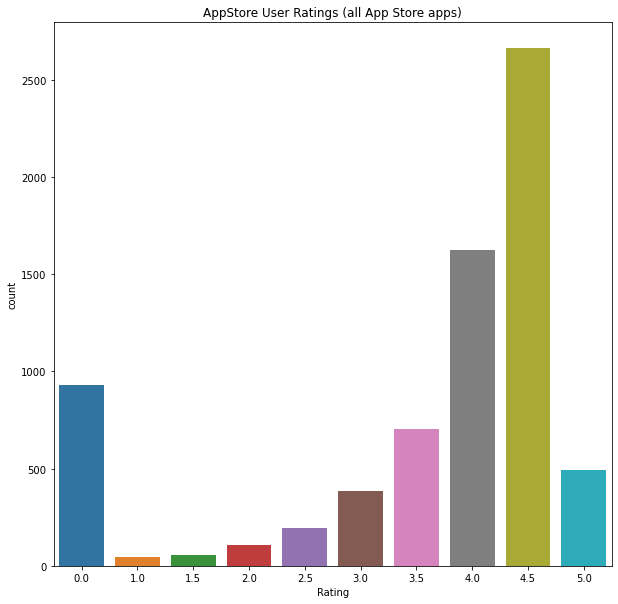

In [9]:
print("The Apple App store has a mean rating of ", apple_df['Rating'].mean())
print("The Apple App store has a standard deviation rating of ", apple_df['Rating'].std())

plt.figure(figsize = (10,10))
plt.title('AppStore User Ratings (all App Store apps)')
sns.countplot(x='Rating', data = apple_df)

apple_df = apple_df[apple_df['Rating'] > 0.0]

The Google Play store has a mean true rating of 4.193338315362443
The Google Play store has a mean binned rating of 4.38404868673927
The Google Play store has a standard deviation rating of  0.5329582666777627


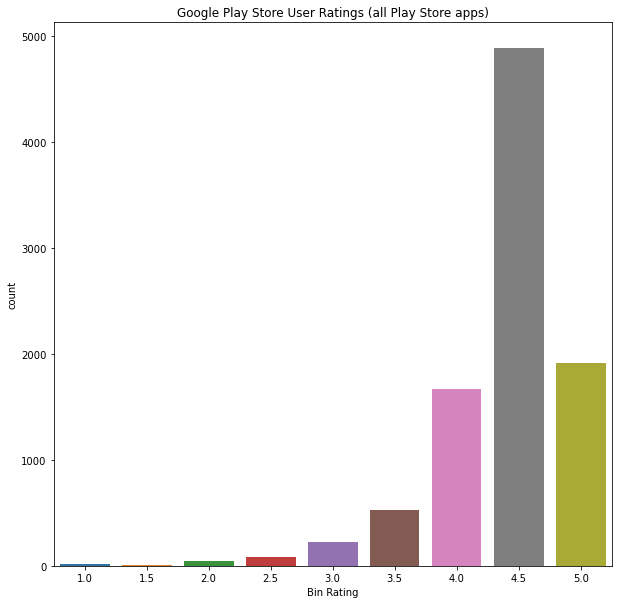

In [10]:
rating_bins = [0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = [1.0, 1.5, 2.0, 2.5,3.0, 3.5, 4.0, 4.5, 5.0]
ggplay_df['Bin Rating'] = pd.cut(ggplay_df['Rating'], bins = rating_bins, labels = labels).astype('float64')
print("The Google Play store has a mean true rating of", ggplay_df['Rating'].mean())
print("The Google Play store has a mean binned rating of", ggplay_df['Bin Rating'].mean())
print("The Google Play store has a standard deviation rating of ", ggplay_df['Bin Rating'].std())


plt.figure(figsize = (10,10))
plt.title('Google Play Store User Ratings (all Play Store apps)')
sns.countplot(x='Bin Rating', data = ggplay_df)

But what lies wihin these graphs is fake news, as it doesn't take in to account that the App Store's data set represents the unrated apps with a zero rather than an NaN. As such the App Store's rating was unfairly lowered than the true average rating.

Here is the App Store rating distribution again, this time without the unrated apps.

The Apple App store has a mean rating of 4.049696873005743
The Apple App store has a standard deviation rating of  0.7269427318908778


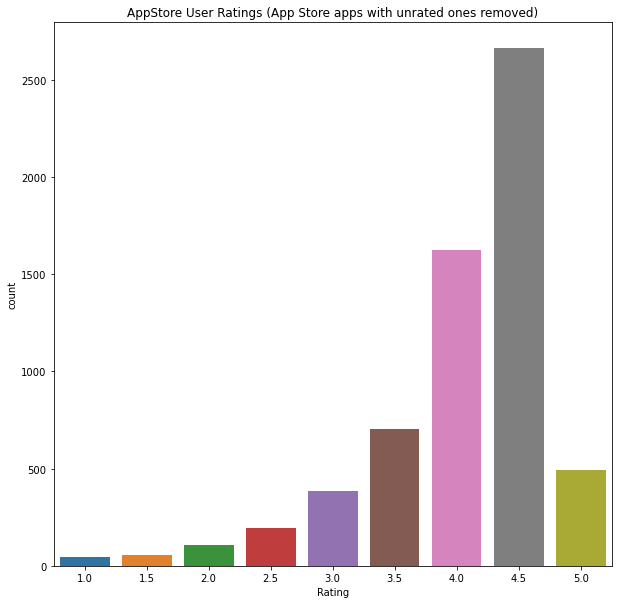

In [11]:
print("The Apple App store has a mean rating of", apple_df['Rating'].mean())
print("The Apple App store has a standard deviation rating of ", apple_df['Rating'].std())
plt.figure(figsize = (10,10))
plt.title('AppStore User Ratings (App Store apps with unrated ones removed)')
sns.countplot(x='Rating', data = apple_df)

Yet even in this distribution and its mean, we notice it still falls short compared to the Play Store.

So going by the two bar graphs and their respective average ratings, we'd have to give a point to the Play Store here. As consumers against big corporate though, we need to be educated and not take this at face value as there could be many possible reasons for this that aren't initially clear, even with our fix of removing the unrated apps.

For one, a simple count plot by ratings in no way takes into account the number of ratings for a specific app. So we could have a situation where an app with 2 ratings is sitting at 5 stars which would be ranked higher than an app wih 4.5 stars with 50,000 ratings. This is clearly an issue since with only 2 ratings, we cannot yet determine the actual quality of the application. Those two ratings could easily be the developer and his friend.

Secondly, "ratings bombing" and "buying ratings" is another issue that totally exists. On both sides of you might have situations where a community artifically boosts or lowers a apps rating.

----------------------------------------------------------------------------------------------------------------------

But what about for the apps that actually matter? We can try taking a look at the top 10% most popular apps in each store to perform the same analysis. As the App Store dataset doesn't have a count of installs, for the most popular apps in this storefront, we will be using the number of ratings to determine the popularity. And for the Play Store dataset, we will be using the number of installs to do the same.






The Apple App store has a mean rating of paid apps as  4.066326530612245
The Apple App store has a standard deviation rating of paid apps as  0.7048541930776171


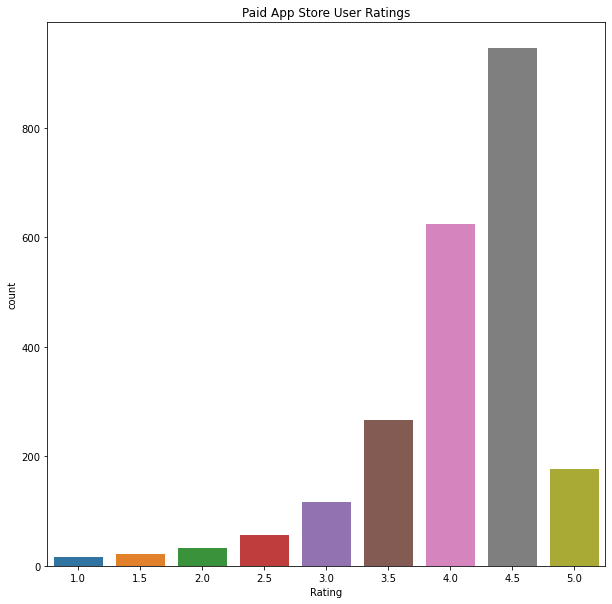

In [12]:
plt.figure(figsize = (10,10))
plt.title('Paid App Store User Ratings')
paidApple = apple_df[(apple_df['Price'] > 0.99)]
print("The Apple App store has a mean rating of paid apps as ", paidApple['Rating'].mean())
print("The Apple App store has a standard deviation rating of paid apps as ", paidApple['Rating'].std())
sns.countplot(x='Rating', data = paidApple)

The Google Play Store has a mean rating of 4.260370370370369
The Google Play Store has a standard deviation rating of paid apps as  0.5517251169616252


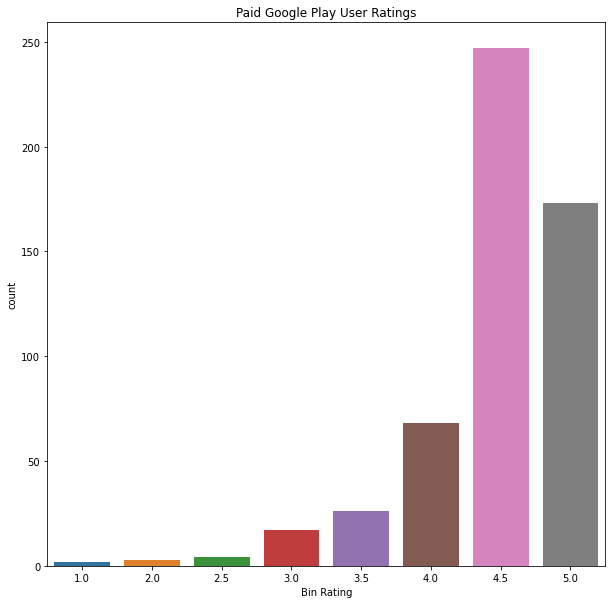

In [13]:
plt.figure(figsize = (10,10))
plt.title('Paid Google Play User Ratings')
paid_play = ggplay_df[(ggplay_df['Price'] > 0.99)]
print("The Google Play Store has a mean rating of", paid_play['Rating'].mean())
print("The Google Play Store has a standard deviation rating of paid apps as ", paid_play['Rating'].std())
sns.countplot(x='Bin Rating', data = paid_play)

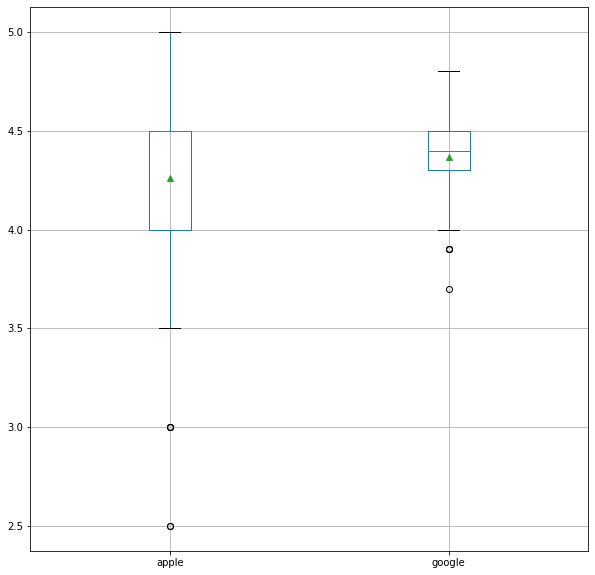

In [14]:
dropped_play = ggplay_df.sort_values(by=['Installs_plus'], ascending=False).drop_duplicates(keep = 'first', inplace = False).head(100)
dropped_apple = apple_df.sort_values(by=['Rating Count'], ascending=False).drop_duplicates(keep = 'first', inplace = False).head(100)
temp_play = list(dropped_play['Rating'])
temp_apple = list(dropped_apple['Rating'])
temp_both = pd.DataFrame()
temp_both['apple'] = temp_apple
temp_both['google'] = temp_play
temp_both.boxplot(showmeans=True, figsize = (10,10) )

### B.
So these the previous avenue of exploring which storefront is better has led us to some interesting observations, but as mentioned by the end no true conclusion can be drawn yet.

Good thing there still lies a major feature of the apps that is always a factor for a person in buying apps - the price!

Another often heard claim is that the App Store has better bang for your buck in terms of apps.

So this begs the hypothesis - "Is higher price indicative of better quality apps a stronger claim in the App Store than in the Google Play Store?"

To answer this, we shall attempt to perform linear regression on the the two in order to see which store front holds a higher correlation for price to app rating.

c:\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


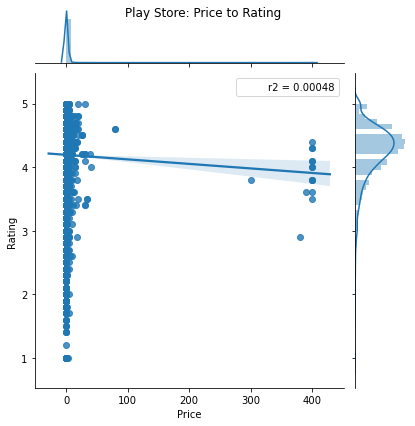

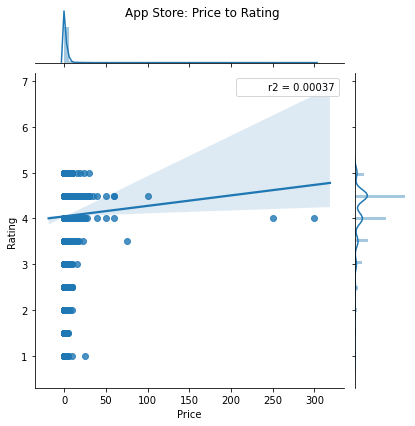

In [15]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

ax = sns.jointplot(x='Price', y='Rating', data=ggplay_df, kind='reg', stat_func=r2).fig.suptitle("Play Store: Price to Rating")
ax = sns.jointplot(x='Price', y='Rating', data=apple_df, kind='reg', stat_func=r2).fig.suptitle("App Store: Price to Rating")

Looking at our two jointplots showing the linear regression between the two storefronts, we notice that the Apple App Store has a higher R^2 for price as a predictor of rating. Heck, Google Play has a negative correlation between the two.

And if we were to only look at paid apps, we see:

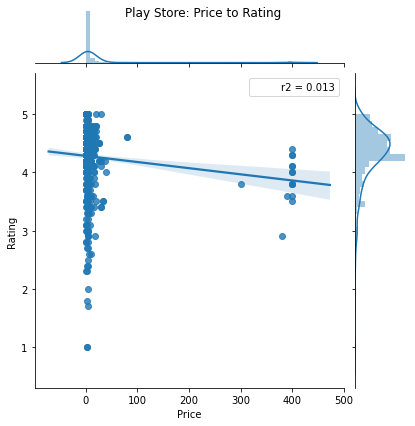

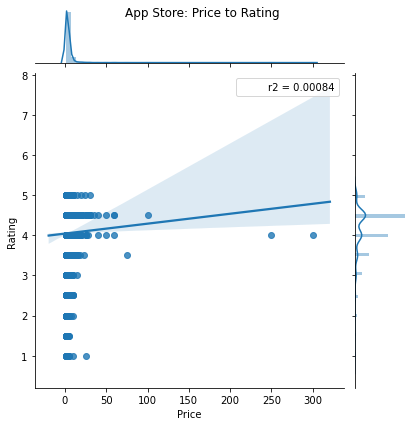

In [16]:
ax = sns.jointplot(x='Price', y='Rating', data=ggplay_df[ggplay_df['Type'] == 'Paid'], kind='reg', stat_func=r2).fig.suptitle("Play Store: Price to Rating")
ax = sns.jointplot(x='Price', y='Rating', data=apple_df[apple_df['Type'] == 'Paid'], kind='reg', stat_func=r2).fig.suptitle("App Store: Price to Rating")

Showing us that when looking only at paid apps, Google Play doesn't fare as badly as it did with all recorded apps, but it still has a negative correlation.

The App Store on the other hand has a lower R2 score and a weaker correlation, yet still positively correlated.

Overall, it seems that price cannot be safely used as an indicator of app quality in Google Play. In Apple, one could make a very broad guess with it.


### C. The Zoomer Generation


Returning to the initial analysis' possible interpretation leading to the line of thought that Apple IOS has a younger userbase than Android, we wondered if that was actually true. But we obviously cannot look directly into this as we would need to sample from a large enough population of users representative of the true population and ask them what mobile operating system they use and how old they are. So a more feasible option we saw was to hopefully extrapolate some information about that by looking at their respective Content Rating distribution.

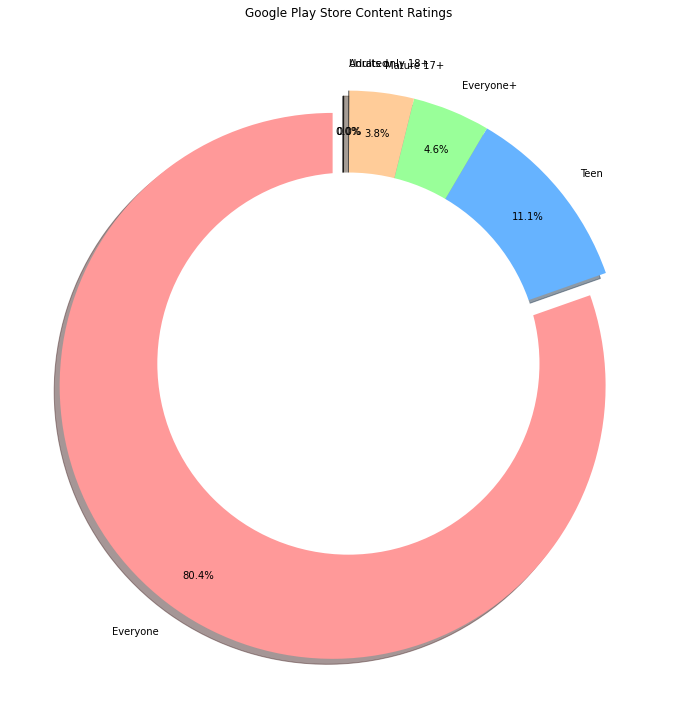

In [17]:
ggplay_content_labels = ['Everyone', 'Teen', 'Everyone+', 'Mature 17+', 'Adults only 18+', 'Unrated']
explode = (0.1, 0.0, 0, 0, 0.0, 0.0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#000000', '#000000']

plt.figure(figsize = (10,10))
plt.title('Google Play Store Content Ratings')
plt.pie(x = ggplay_df['Content Rating'].value_counts(), colors = colors, pctdistance=0.85, explode = explode,  labels = ggplay_content_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()



centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

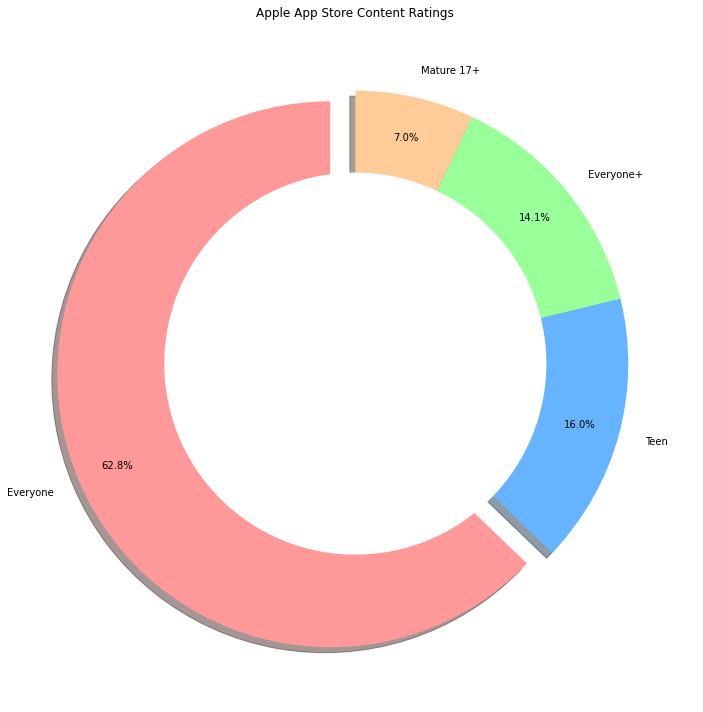

In [18]:
apple_content_labels = ggplay_content_labels[:4]
explode = (0.1, 0.0, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize = (10,10))
plt.title('Apple App Store Content Ratings')
# sns.countplot(x='Content Rating', data = apple_df)
plt.pie(x = apple_df['Content Rating'].value_counts(), colors = colors, pctdistance=0.85, explode = explode, labels = apple_content_labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Simply looking at these pie charts showing the distribution of age ratings in each storefront, we see that while both are majority rated for Everyone, one can't so easily make the claim that Apple has a younger user base merely by looking at the distribution content ratings as Google Play has a sizably higher percentage of apps rated for Everyone %80.4 compared to Apple's Everyone sitting at %61.6.

----------------------------------------------------------------------------------------------------------------------


### B. Analysis, Hypothesis Testing, & ML - Apple Strikes Back
In a valiant attempt to determine where Apple may win over Google Play Store, We will attempt to perform KNN regressor to determine the price of what we might want to look for in an app: A game app for Everyone+ (10 and up) with a high rating of 4.5.

We first try to determine the optimal k for each dataset, first Apple, then Google.

In [19]:
def relabel_content (row):
    if row['Content Rating'] in ['4+'] : return "Everyone"
    if row['Content Rating'] in ['12+'] : return "Teen"
    if row['Content Rating'] in ['9+'] : return "Everyone+"
    if row['Content Rating'] in ['17+'] : return "Mature"
    if row['Content Rating'] in ['Everyone 10+'] : return "Everyone+"
    else:
        return row['Content Rating']

ggplay_df['Content Rating'] = ggplay_df.apply(lambda row: relabel_content(row), axis=1)    
apple_df['Content Rating'] = apple_df.apply(lambda row: relabel_content(row), axis=1)

In [20]:
apple_df = apple_df[apple_df['Price'] > 0.00]
ggplay_df = ggplay_df[ggplay_df['Price'] > 0.00]

def get_cv_error_mse(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y, 
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse

Min for App Store at k =  78    71.437288
dtype: float64


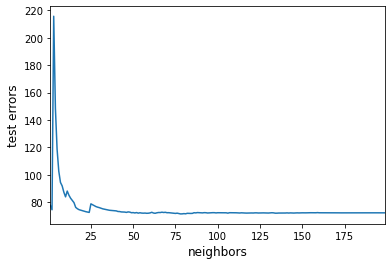

In [22]:
apple_df = apple_df.apply(lambda x:x.fillna(np.random.normal(4.5, 0.5, 1)[0]))

features = ["Rating", "Category", "Content Rating"]
X_dict = apple_df[features].to_dict(orient="records")
y = apple_df["Price"]

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

ks = pd.Series(range(1, 200))
ks.index = range(1, 200)
test_errs = ks.apply(get_cv_error_mse)

test_errs.plot.line()
plt.xlabel('neighbors', fontsize=12)
plt.ylabel('test errors', fontsize=12)
test_errs.sort_values()

print("Min for App Store at k = " , test_errs[test_errs == min(test_errs)])

We have chosen to use imputation by random normal.

We notice that there seems to be a minimum k at k = 78 with a test error of 71.437288 for the Apple Dataset.

----------------------------------------------------------------------------------------------------------------------
Now for the Google Play Dataset, we will do the same. Here too we have chosen to use imputation by random normal.

Min for Google Play at k =  4    2315.367445
dtype: float64


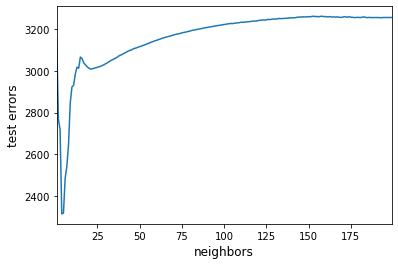

In [23]:
ggplay_df = ggplay_df.apply(lambda x:x.fillna(np.random.normal(4.5, 0.5, 1)[0]))

features = ["Rating", "Genre", "Content Rating"]
X_dict = ggplay_df[features].to_dict(orient="records")
y = ggplay_df["Price"]

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

ks = pd.Series(range(1, 200))
ks.index = range(1, 200)
test_errs = ks.apply(get_cv_error_mse)

test_errs.plot.line()
plt.xlabel('neighbors', fontsize=12)
plt.ylabel('test errors', fontsize=12)
test_errs.sort_values()

print("Min for Google Play at k = " , test_errs[test_errs == min(test_errs)])

We notice that there seems to be a minimum k at k = 4 with a test error of 2315.367445 for the Play Store Dataset.

Our interpretation of this is that it is due to the fact that Google Play's Paid apps in this dataset has a population of 800 rows, while Apple has 2885.

----------------------------------------------------------------------------------------------------------

We now choose to run the KNN with the above specified game for everyone+ and a rating of 4.5.

We run it with both datasets for each k found.

In [24]:
ggplay_df = pd.get_dummies(ggplay_df, columns = ['Genre', 'Content Rating'])
apple_df = pd.get_dummies(apple_df, columns = ['Category', 'Content Rating'])

In [25]:
# define the training data
X_train = apple_df[["Rating", "Category_Games", "Content Rating_Everyone+"]]
y_train = apple_df["Price"]

app_knn = {}
# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit the 5-nearest neighbors model
model = KNeighborsRegressor(n_neighbors=78)
model.fit(X_train_sc, y_train)

# define the test data (Scikit-Learn expects a matrix)
x_new = pd.DataFrame()
x_new["Rating"] = [4.5]
x_new["Content Rating_Everyone+"] = [1]
x_new["Category_Games"] = [1]
x_new_sc = scaler.transform(x_new)

# use the model to predict on the test data
print("Price =", model.predict(x_new_sc))
(model.predict(x_new_sc))

Price = [4.19512821]


array([4.19512821])

In [27]:
# define the training data
X_train = ggplay_df[["Bin Rating", "Genre_Games", "Content Rating_Everyone+"]]
y_train = ggplay_df["Price"]

gg_knn = {}
# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit the 5-nearest neighbors model
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train_sc, y_train)

# define the test data (Scikit-Learn expects a matrix)
x_new = pd.DataFrame()
x_new["Bin Rating"] = [4.5]
x_new["Content Rating_Everyone+"] = [1]
x_new["Genre_Games"] = [1]
x_new_sc = scaler.transform(x_new)

# use the model to predict on the test data
print("Price =", model.predict(x_new_sc))
(model.predict(x_new_sc))

Price = [2.49]


array([2.49])

Now we will be using the k = 5, from Google Play's.

-----------------------------------------------------------------------------------------------------------------------------
It seems that Apple loses in this test, as the prediction is more expensive for Apple to get the game with the same qualifications.